Epoch 1/5
   1/1875 [..............................] - ETA: 11:00 - loss: 2.3090 - accuracy: 0.0938

2023-02-23 19:59:34.935846: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


1872/1875 [============================>.] - ETA: 0s - loss: 0.4645 - accuracy: 0.8310

2023-02-23 19:59:50.159699: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


1875/1875 [==============================] - 17s 9ms/step - loss: 0.4643 - accuracy: 0.8310 - val_loss: 0.3540 - val_accuracy: 0.8710
Epoch 2/5
1875/1875 [==============================] - 15s 8ms/step - loss: 0.2990 - accuracy: 0.8902 - val_loss: 0.2806 - val_accuracy: 0.8960
Epoch 3/5
1875/1875 [==============================] - 15s 8ms/step - loss: 0.2522 - accuracy: 0.9067 - val_loss: 0.2762 - val_accuracy: 0.8994
Epoch 4/5
1875/1875 [==============================] - 15s 8ms/step - loss: 0.2238 - accuracy: 0.9161 - val_loss: 0.2776 - val_accuracy: 0.9008
Epoch 5/5
 31/313 [=>............................] - ETA: 1s

2023-02-23 20:00:51.935385: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


313/313 [==============================] - 1s 4ms/step


/var/folders/1t/sj3jytd91z53kgnkw3mqp59r0000gn/T/ipykernel_97568/1342758648.py:54: RuntimeWarning: invalid value encountered in divide
  channel_image /= channel_image.std()


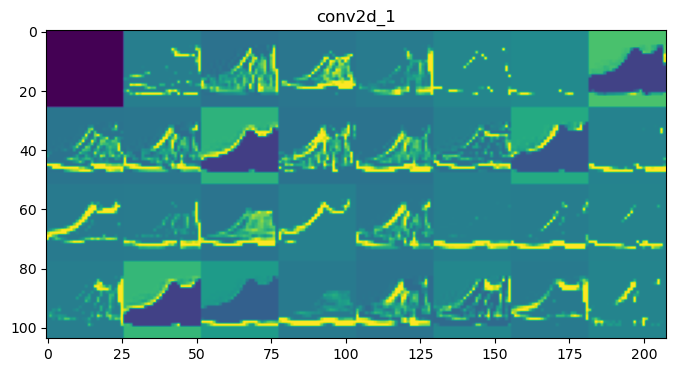

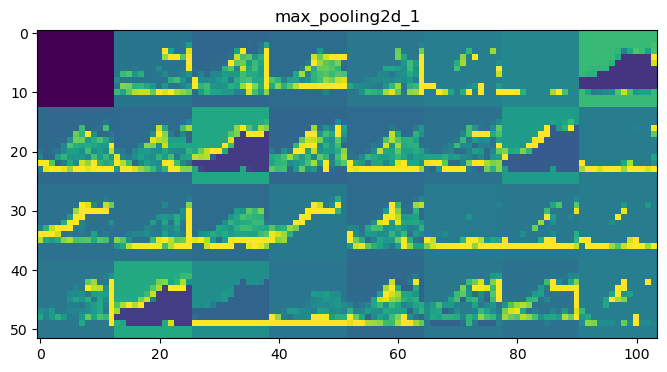

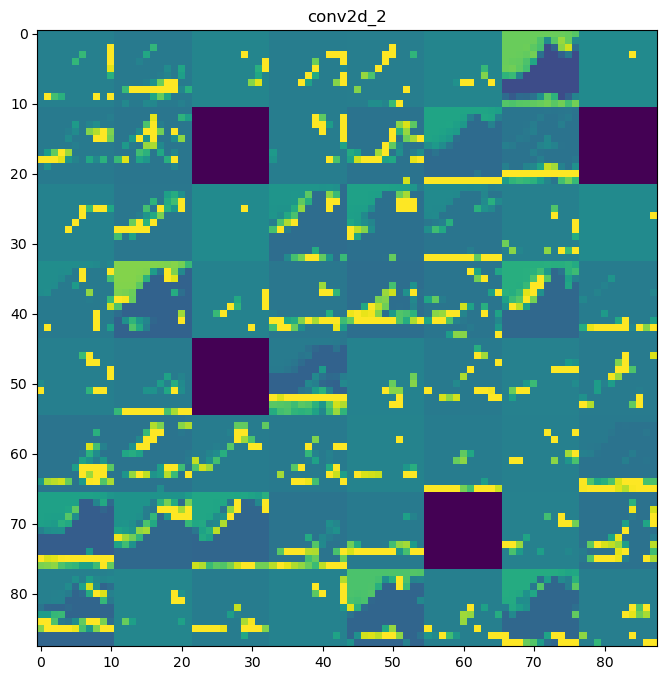

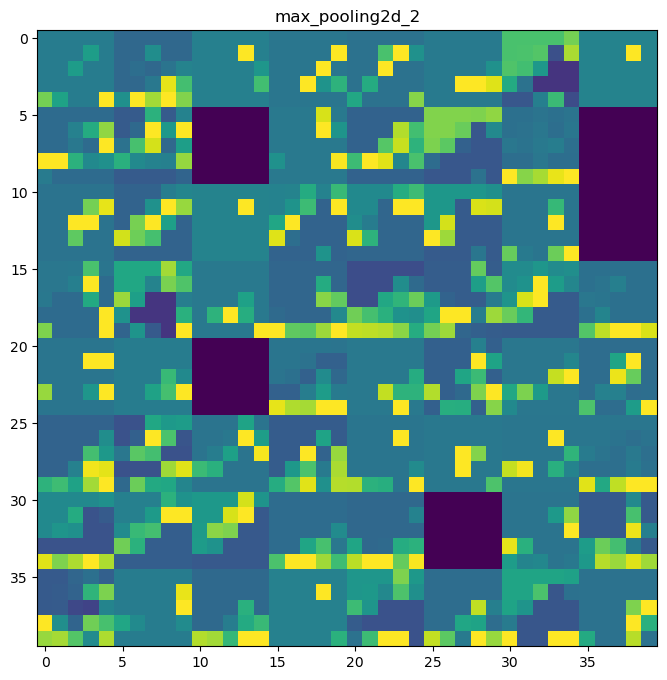

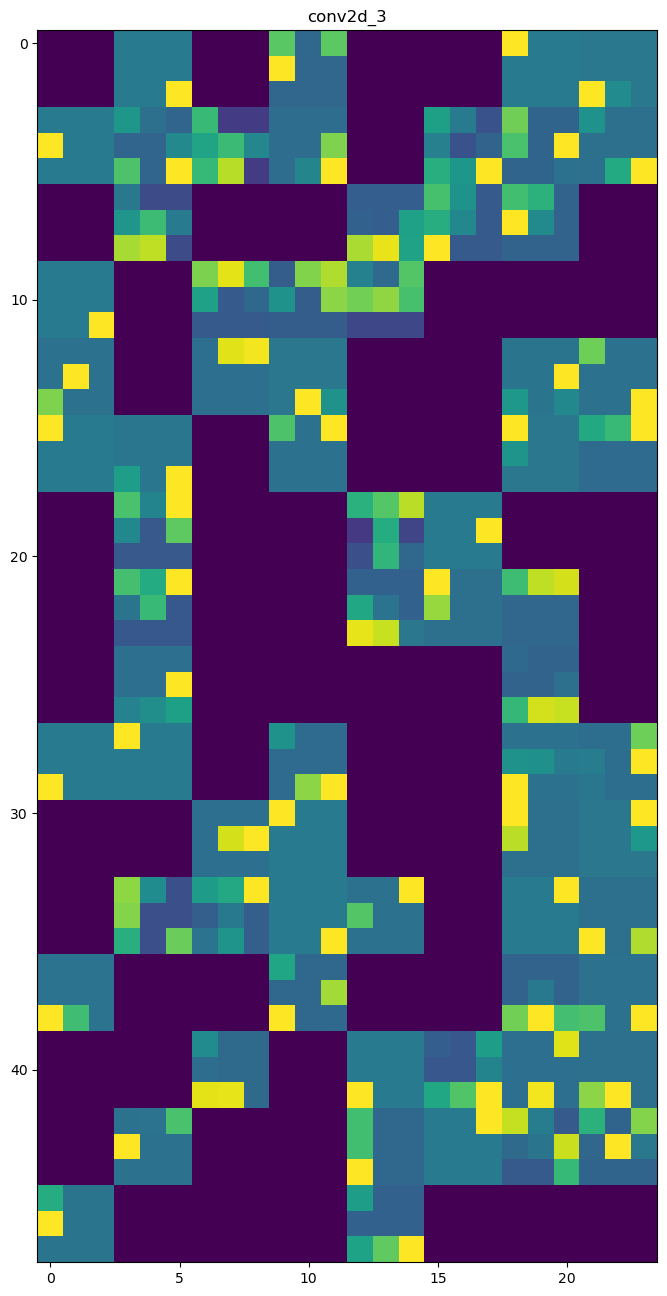

In [4]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

# Load and preprocess the dataset
fashion_mnist = tf.keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()
train_images = train_images.reshape((60000, 28, 28, 1))
train_images = train_images / 255.0
test_images = test_images.reshape((10000, 28, 28, 1))
test_images = test_images / 255.0


# Define the CNN architecture
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1), name='conv2d_1'),
    tf.keras.layers.MaxPooling2D((2, 2), name='max_pooling2d_1'),
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu', name='conv2d_2'),
    tf.keras.layers.MaxPooling2D((2, 2), name='max_pooling2d_2'),
    tf.keras.layers.Conv2D(128, (3, 3), activation='relu', name='conv2d_3'),
    tf.keras.layers.Flatten(name='flatten'),
    tf.keras.layers.Dense(128, activation='relu', name='dense_1'),
    tf.keras.layers.Dense(10, activation='softmax', name='output')
])

# Compile the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Train the model and display the activations after each epoch

history = model.fit(train_images, train_labels, epochs=5, validation_data=(test_images, test_labels))

# Get the layer outputs and names
layer_names = ['conv2d_1', 'max_pooling2d_1', 'conv2d_2', 'max_pooling2d_2', 'conv2d_3']
layer_outputs = [layer.output for layer in model.layers if layer.name in layer_names]
activation_model = tf.keras.models.Model(inputs=model.input, outputs=layer_outputs)

# Get the activation outputs for the test images
activations = activation_model.predict(test_images)
# Display the activation outputs of the convolutional layers as images on a grid

# Display the activation outputs of the convolutional layers as images on a grid
for layer_name, layer_activation in zip(layer_names, activations):
    n_features = layer_activation.shape[-1]
    size = layer_activation.shape[1]
    n_cols = n_features // 8
    display_grid = np.zeros((size * n_cols, 8 * size))
    for col in range(n_cols):
        for row in range(8):
            channel_image = layer_activation[0, :, :, col * 8 + row]
            channel_image -= channel_image.mean()
            channel_image /= channel_image.std()
            channel_image *= 64
            channel_image += 128
            channel_image = np.clip(channel_image, 0, 255).astype('uint8')
            display_grid[col * size:(col + 1) * size, row * size:(row + 1) * size] = channel_image
    scale = 1. / size
    plt.figure(figsize=(scale * display_grid.shape[1], scale * display_grid.shape[0]))
    plt.title(layer_name)
    plt.grid(False)
    plt.imshow(display_grid, aspect= 'auto')    
plt.show()
